In [90]:
library(brms)
library(tidyverse)
library(BH)
library(loo)
options(mc.cores = 4)
library(magrittr)
options(repr.plot.width = 10, repr.plot.height = 7, repr.plot.res = 200)


In [2]:
#get file names
sfs_files <- list.files("../data/angsd_sfs/", full.names = TRUE)[grep(pattern = "sfs.txt", x =  list.files("../data/angsd_sfs/"))]

#drop empty files
sfs_files <- sfs_files[map_dbl(sfs_files, ~file.size(.x)) > 0]

#parse file names for data details
#ref <- str_extract(sfs_files, "(v5|til11)")
ref <- str_extract(sfs_files, "(v5)")
ssp <- str_extract(sfs_files, "(LR|Teo)")
pop <- str_extract(sfs_files, "--(LR|Teo)--(.+)_fold") %>% str_replace("--(LR|Teo)--(.+)_fold", "\\2")
pop <- paste0(ssp, "_", pop)
fold <- str_extract(sfs_files, "fold\\d") %>% str_remove("fold")
nucs <- str_extract(sfs_files, "fold(0|4)_(..+)_sfs.txt") %>% str_replace("fold(0|4)_(..+)_sfs.txt", "\\2")


#read in data, convert to long, add data details, filter, compute alpha
sfs_df <- 
sfs_files %>% 
    map_df(~{
        df <- read_delim(.x, delim = " ", col_names = FALSE)
        df[, 1:(ncol(df))-1]
    }) %>% 
    mutate(ref, ssp, pop, fold, nucs) %>% 
    mutate(nuc_type = case_when(
              nucs == "AT,AG,AC,TA,TG,TC,GA,GT,GC,CA,CT,CG" ~ "All",
              nucs == "AT,TA,GC,CG" ~ "SS_WW",
              nucs == "AG,AC,TG,TC" ~ "WS",
              nucs == "GA,GT,CA,CT" ~ "SW")) %>% 
    pivot_longer(cols = starts_with("X"), names_to = "allele_frequency", values_to = "frequency") %>% 
    drop_na() %>% 
    mutate(allele_frequency = as.numeric(str_remove(allele_frequency, "X"))-1) %>% 
    group_by(ref, ssp, pop, fold, nucs) %>% 
    mutate(allele_frequency = allele_frequency/max(allele_frequency)) %>% 
    group_by(fold) %>% 
    group_split() %>% 
    reduce(
        full_join,
        by = c("ref", "ssp", "pop", "nucs", "nuc_type", "allele_frequency"), 
        suffix = c("_0", "_4")
    ) %>% 
    group_by(ref, ssp, pop, nuc_type) %>%
    arrange(ref, ssp, pop, nuc_type, allele_frequency) %>% 
    mutate(fixed_0 = last(frequency_0),
         fixed_4 = last(frequency_4),
         alpha = 1 - (fixed_4/fixed_0) * (frequency_0/frequency_4)
         ) %>% 
    ungroup() %>% 
    drop_na() %>% 
    mutate(alpha_scaled = (alpha - mean(alpha))/ sd(alpha)) 

sfs_df

Parsed with column specification:
cols(
  .default = col_double(),
  X22 = col_logical()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_double(),
  X22 = col_logical()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_double(),
  X22 = col_logical()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_double(),
  X22 = col_logical()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_double(),
  X22 = col_logical()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_double(),
  X22 = col_logical()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_double(),
  X22 = col_logical()
)

See spec(...) for full column specifications.

Parsed with column specific

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_double(),
  X22 = col_logical()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_double(),
  X22 = col_logical()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_double(),
  X22 = col_logical()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_double(),
  X22 = col_logical()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_double(),
  X22 = col_logical()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_double(),
  X22 = col_logical()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_double(),
  X22 = col_logical()
)

See spec(...) for full colu

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_double(),
  X102 = col_logical()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_double(),
  X102 = col_logical()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_double(),
  X102 = col_logical()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_double(),
  X102 = col_logical()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_double(),
  X102 = col_logical()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_double(),
  X102 = col_logical()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_double(),
  X102 = col_logical()
)

See spec(...) for fu

Parsed with column specification:
cols(
  .default = col_double(),
  X22 = col_logical()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_double(),
  X22 = col_logical()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_double(),
  X22 = col_logical()
)

See spec(...) for full column specifications.



ref,ssp,pop,fold_0,nucs,nuc_type,allele_frequency,frequency_0,fold_4,frequency_4,fixed_0,fixed_4,alpha,alpha_scaled
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
v5,LR,LR_Amatlan_de_Canas,0,"AT,AG,AC,TA,TG,TC,GA,GT,GC,CA,CT,CG",All,0.00,6457821.4327,4,1671423.1632,99328.27,101615.76,-2.952645e+00,-4.99887562
v5,LR,LR_Amatlan_de_Canas,0,"AT,AG,AC,TA,TG,TC,GA,GT,GC,CA,CT,CG",All,0.05,12398.5504,4,10697.4282,99328.27,101615.76,-1.857134e-01,-0.42861401
v5,LR,LR_Amatlan_de_Canas,0,"AT,AG,AC,TA,TG,TC,GA,GT,GC,CA,CT,CG",All,0.10,6746.7555,4,6784.2531,99328.27,101615.76,-1.737515e-02,-0.15056241
v5,LR,LR_Amatlan_de_Canas,0,"AT,AG,AC,TA,TG,TC,GA,GT,GC,CA,CT,CG",All,0.15,4900.0686,4,5021.5391,99328.27,101615.76,1.717409e-03,-0.11902640
v5,LR,LR_Amatlan_de_Canas,0,"AT,AG,AC,TA,TG,TC,GA,GT,GC,CA,CT,CG",All,0.20,3253.4400,4,3826.6233,99328.27,101615.76,1.302083e-01,0.09320753
v5,LR,LR_Amatlan_de_Canas,0,"AT,AG,AC,TA,TG,TC,GA,GT,GC,CA,CT,CG",All,0.25,2642.8796,4,3072.0506,99328.27,101615.76,1.198895e-01,0.07616361
v5,LR,LR_Amatlan_de_Canas,0,"AT,AG,AC,TA,TG,TC,GA,GT,GC,CA,CT,CG",All,0.30,2148.2858,4,2544.8570,99328.27,101615.76,1.363916e-01,0.10342081
v5,LR,LR_Amatlan_de_Canas,0,"AT,AG,AC,TA,TG,TC,GA,GT,GC,CA,CT,CG",All,0.35,1770.6815,4,2226.9197,99328.27,101615.76,1.865627e-01,0.18629066
v5,LR,LR_Amatlan_de_Canas,0,"AT,AG,AC,TA,TG,TC,GA,GT,GC,CA,CT,CG",All,0.40,1614.3315,4,1903.6014,99328.27,101615.76,1.324293e-01,0.09687608


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



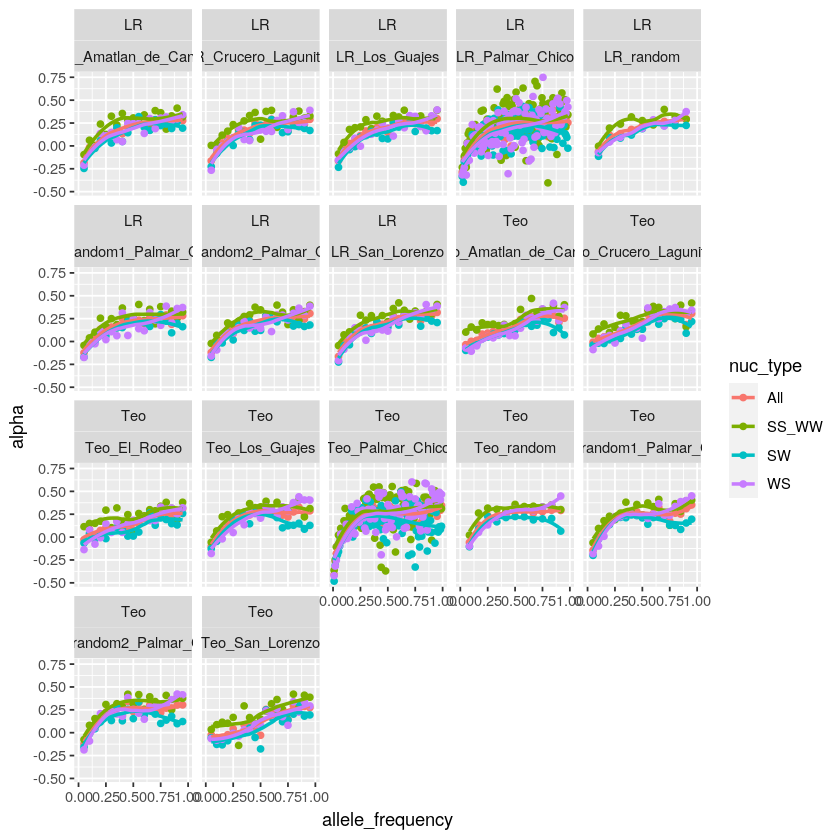

In [3]:
sfs_df %>% 
#filter(ssp == "Teo", nuc_type == "SW") %>% 
filter(between(allele_frequency, left = 0.01, right = 0.99)) %>% 
ggplot(aes(allele_frequency, alpha, colour = nuc_type)) +
geom_point() +
geom_smooth(se = F) +
facet_wrap(~ ssp + pop)

In [28]:
prior1 <- c(
  set_prior(prior = "normal(0, 0.1)", class = "b",  nlpar = "a"),
    set_prior(prior = "normal(0, .1)", class = "b",  nlpar = "b", ub = 0),
    set_prior(prior = "normal(0, .1)", class = "b",  nlpar = "c"),
    set_prior(prior = "normal(0, .1)", class = "sd",  nlpar = "a"),
    set_prior(prior = "normal(0, .1)", class = "sd",  nlpar = "b"),
    set_prior(prior = "normal(0, .1)", class = "sd",  nlpar = "c"),
   set_prior(prior = "normal(0, .1)", class = "sigma")
)


get_prior(
bf(
    alpha ~ a + b * exp(-c * allele_frequency), 
          a + b + c ~ 1 + allele_frequency + 
      (1 + allele_frequency | pop) +
      (1 +  allele_frequency | nuc_type) + 
      ssp,
    nl = TRUE
  ),
  #prior = prior1,
  data = filter(sfs_df, 
         between(allele_frequency, 0.1, 0.9)), #!!!
  family = gaussian()
)

print(make_stancode(
bf(
    alpha ~ a + b * exp(-c * allele_frequency), 
          a + b + c ~ 1 + allele_frequency + 
      (1 + allele_frequency | pop) +
      (1 +  allele_frequency | nuc_type) + 
      ssp,

    nl = TRUE
  ),
  prior = prior1,
  data = filter(sfs_df, 
         between(allele_frequency, 0.1, 0.9)), #!!!
  family = gaussian()
))

prior,class,coef,group,resp,dpar,nlpar,bound
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
lkj(1),cor,,,,,,
,cor,,nuc_type,,,,
,cor,,pop,,,,
"student_t(3, 0, 2.5)",sigma,,,,,,
,b,,,,,a,
,b,allele_frequency,,,,a,
,b,Intercept,,,,a,
,b,sspTeo,,,,a,
"student_t(3, 0, 2.5)",sd,,,,,a,


// generated with brms 2.13.5
functions {
}
data {
  int<lower=1> N;  // number of observations
  vector[N] Y;  // response variable
  int<lower=1> K_a;  // number of population-level effects
  matrix[N, K_a] X_a;  // population-level design matrix
  int<lower=1> K_b;  // number of population-level effects
  matrix[N, K_b] X_b;  // population-level design matrix
  int<lower=1> K_c;  // number of population-level effects
  matrix[N, K_c] X_c;  // population-level design matrix
  // covariate vectors for non-linear functions
  vector[N] C_1;
  // data for group-level effects of ID 1
  int<lower=1> N_1;  // number of grouping levels
  int<lower=1> M_1;  // number of coefficients per level
  int<lower=1> J_1[N];  // grouping indicator per observation
  // group-level predictor values
  vector[N] Z_1_a_1;
  vector[N] Z_1_a_2;
  int<lower=1> NC_1;  // number of group-level correlations
  // data for group-level effects of ID 2
  int<lower=1> N_2;  // number of grouping levels
  int<lower=1> 

In [ ]:
#MODELS

prior1 <- c(
    set_prior(prior = "normal(0, 0.25)", class = "b", nlpar = "a"),
    set_prior(prior = "normal(0, 0.25)", class = "b", nlpar = "b", ub = 0),
    set_prior(prior = "normal(0, 0.25)", class = "b", nlpar = "c"),
    set_prior(prior = "normal(0, 0.25)", class = "sd", nlpar = "a"),
    set_prior(prior = "normal(0, 0.25)", class = "sd", nlpar = "b"),
    set_prior(prior = "normal(0, 0.25)", class = "sd", nlpar = "c"),
    set_prior(prior = "normal(0, 0.25)", class = "sigma")
)

delt <- 0.98
treed <- 10
its <- 10000
thn <- 4
chns  <- 4

# 1 + x + (1 + x | g) 
mod_cor <- brm(
  bf(
    alpha ~ a + b * exp(-c * allele_frequency), 
            a + b + c ~ 1 + allele_frequency + 
            (1 + allele_frequency | pop) +
            (1 + allele_frequency | nuc_type) + 
            ssp,
    nl = TRUE),
  data = filter(sfs_df, between(allele_frequency, 0.01, 0.99)), #!!!
  family = gaussian(),
  iter = its,
  thin = thn,
  chains = chns,
  prior = prior1, 
  control = list(adapt_delta = delt, max_treedepth = treed)) %>%
  add_criterion("loo")


mod_cor_no_ssp <- brm(
  bf(
    alpha ~ a + b * exp(-c * allele_frequency), 
            a + b + c ~ 1 + allele_frequency + 
            (1 + allele_frequency | pop) +
            (1 + allele_frequency | nuc_type),
    nl = TRUE),
  data = filter(sfs_df, between(allele_frequency, 0.01, 0.99)), #!!!
  family = gaussian(),
  iter = its,
  thin = thn,
  chains = chns,
  prior = prior1,
  control = list(adapt_delta = delt, max_treedepth = treed)) %>%
  add_criterion("loo")


mod_cor_no_pop <- brm(
  bf(
    alpha ~ a + b * exp(-c * allele_frequency), 
            a + b + c ~ 1 + allele_frequency + 
            (1 + allele_frequency | nuc_type) + 
            ssp,
    nl = TRUE),
  data = filter(sfs_df, between(allele_frequency, 0.01, 0.99)), #!!!
  family = gaussian(),
  iter = its,
  thin = thn,
  chains = chns,
  prior = prior1,
  control = list(adapt_delta = delt, max_treedepth = treed)) %>%
  add_criterion("loo")

mod_cor_no_nuc <- brm(
  bf(
    alpha ~ a + b * exp(-c * allele_frequency), 
            a + b + c ~ 1 + allele_frequency + 
            (1 + allele_frequency | pop) +
            ssp,
    nl = TRUE),
  data = filter(sfs_df, between(allele_frequency, 0.01, 0.99)), #!!!
  family = gaussian(),
  iter = its,
  thin = thn,
  chains = chns,
  prior = prior1,
  control = list(adapt_delta = delt, max_treedepth = treed)) %>%
  add_criterion("loo")


#Save models
#commented out to avoid overwriting. 
#saveRDS(mod_cor, file = "../data/mk_models/mod_cor.rds")
#saveRDS(mod_cor_no_ssp, file = "../data/mk_models/mod_cor_no_ssp.rds")
#saveRDS(mod_cor_no_pop, file = "../data/mk_models/mod_cor_no_pop.rds")
#saveRDS(mod_cor_no_nuc, file = "../data/mk_models/mod_cor_no_nuc.rds")

Compiling Stan program...

Start sampling

Compiling Stan program...

Start sampling



In [ ]:
prior2 <- c(
    set_prior(prior = "normal(0, 0.25)", class = "b", nlpar = "a"),
    set_prior(prior = "normal(0, 0.25)", class = "b", nlpar = "b", ub = 0),
    set_prior(prior = "normal(0, 0.25)", class = "b", nlpar = "c"),
    set_prior(prior = "normal(0, 0.25)", class = "sigma")
)

mod_fixed <- brm(
  bf(
    alpha ~ a + b * exp(-c * allele_frequency),
            a + b + c ~ 1 + pop + nuc_type + ssp + pop*nuc_type,
    nl = TRUE),
  data = filter(sfs_df, between(allele_frequency, 0.01, 0.99)), #!!!
  family = gaussian(),
  iter = its,
  thin = thn,
  chains = chns,
  prior = prior2, 
  control = list(adapt_delta = delt, max_treedepth = treed)) %>%
  add_criterion("loo")

saveRDS(mod_fixed, file = "../data/mk_models/mod_fixed.rds")

Compiling Stan program...

Start sampling



In [59]:
#read models
readRDS("../data/mk_models/mod_cor.rds")
readRDS("../data/mk_models/mod_cor_no_ssp.rds")
readRDS("../data/mk_models/mod_cor_no_pop.rds")
readRDS("../data/mk_models/mod_cor_no_nuc.rds")
readRDS("../data/mk_models/mod_fixed.rds")

#look for warning about pathology
print("1 HERE")
print(mod_cor)
print("2 HERE")
print(mod_cor_no_ssp)
print("3 HERE")
print(mod_cor_no_pop)
print("4 HERE")
print(mod_cor_no_nuc)
print("5 HERE")
print(mod_fixed)

 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: alpha ~ a + b * exp(-c * allele_frequency) 
         a ~ 1 + allele_frequency + (1 + allele_frequency | pop) + (1 + allele_frequency | nuc_type) + ssp
         b ~ 1 + allele_frequency + (1 + allele_frequency | pop) + (1 + allele_frequency | nuc_type) + ssp
         c ~ 1 + allele_frequency + (1 + allele_frequency | pop) + (1 + allele_frequency | nuc_type) + ssp
   Data: filter(sfs_df, between(allele_frequency, 0.01, 0.9 (Number of observations: 1892) 
Samples: 4 chains, each with iter = 10000; warmup = 5000; thin = 4;
         total post-warmup samples = 5000

Group-Level Effects: 
~nuc_type (Number of levels: 4) 
                                    Estimate Est.Error l-95% CI u-95% CI Rhat
sd(a_Intercept)                         0.07      0.06     0.00     0.23 1.00
sd(a_allele_frequency)                  0.16      0.08     0.06     0.37 1.00
sd(b_Intercept)                         0.07      0.06     0.00     0.21 

Warning message:
“There were 2 divergent transitions after warmup. Increasing adapt_delta above 0.98 may help. See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”


 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: alpha ~ a + b * exp(-c * allele_frequency) 
         a ~ 1 + allele_frequency + (1 + allele_frequency | pop) + (1 + allele_frequency | nuc_type)
         b ~ 1 + allele_frequency + (1 + allele_frequency | pop) + (1 + allele_frequency | nuc_type)
         c ~ 1 + allele_frequency + (1 + allele_frequency | pop) + (1 + allele_frequency | nuc_type)
   Data: filter(sfs_df, between(allele_frequency, 0.01, 0.9 (Number of observations: 1892) 
Samples: 4 chains, each with iter = 10000; warmup = 5000; thin = 4;
         total post-warmup samples = 5000

Group-Level Effects: 
~nuc_type (Number of levels: 4) 
                                    Estimate Est.Error l-95% CI u-95% CI Rhat
sd(a_Intercept)                         0.11      0.07     0.02     0.28 1.00
sd(a_allele_frequency)                  0.18      0.08     0.07     0.39 1.00
sd(b_Intercept)                         0.12      0.08     0.01     0.32 1.00
sd(b_allele_f

 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: alpha ~ a + b * exp(-c * allele_frequency) 
         a ~ 1 + allele_frequency + (1 + allele_frequency | nuc_type) + ssp
         b ~ 1 + allele_frequency + (1 + allele_frequency | nuc_type) + ssp
         c ~ 1 + allele_frequency + (1 + allele_frequency | nuc_type) + ssp
   Data: filter(sfs_df, between(allele_frequency, 0.01, 0.9 (Number of observations: 1892) 
Samples: 4 chains, each with iter = 10000; warmup = 5000; thin = 4;
         total post-warmup samples = 5000

Group-Level Effects: 
~nuc_type (Number of levels: 4) 
                                    Estimate Est.Error l-95% CI u-95% CI Rhat
sd(a_Intercept)                         0.07      0.06     0.00     0.22 1.00
sd(a_allele_frequency)                  0.21      0.09     0.09     0.45 1.00
sd(b_Intercept)                         0.06      0.05     0.00     0.18 1.00
sd(b_allele_frequency)                  0.99      0.14     0.73     1.27 1.00
sd(c_Inter

 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: alpha ~ a + b * exp(-c * allele_frequency) 
         a ~ 1 + allele_frequency + (1 + allele_frequency | pop) + ssp
         b ~ 1 + allele_frequency + (1 + allele_frequency | pop) + ssp
         c ~ 1 + allele_frequency + (1 + allele_frequency | pop) + ssp
   Data: filter(sfs_df, between(allele_frequency, 0.01, 0.9 (Number of observations: 1892) 
Samples: 4 chains, each with iter = 10000; warmup = 5000; thin = 4;
         total post-warmup samples = 5000

Group-Level Effects: 
~pop (Number of levels: 17) 
                                    Estimate Est.Error l-95% CI u-95% CI Rhat
sd(a_Intercept)                         0.01      0.01     0.00     0.03 1.00
sd(a_allele_frequency)                  0.01      0.01     0.00     0.05 1.00
sd(b_Intercept)                         0.10      0.02     0.06     0.15 1.00
sd(b_allele_frequency)                  0.84      0.13     0.60     1.11 1.00
sd(c_Intercept)              

 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: alpha ~ a + b * exp(-c * allele_frequency) 
         a ~ 1 + pop + nuc_type + ssp + pop * nuc_type
         b ~ 1 + pop + nuc_type + ssp + pop * nuc_type
         c ~ 1 + pop + nuc_type + ssp + pop * nuc_type
   Data: filter(sfs_df, between(allele_frequency, 0.01, 0.9 (Number of observations: 1892) 
Samples: 4 chains, each with iter = 10000; warmup = 5000; thin = 4;
         total post-warmup samples = 5000

Population-Level Effects: 
                                            Estimate Est.Error l-95% CI
a_Intercept                                     0.27      0.02     0.23
a_popLR_Crucero_Lagunitas                       0.04      0.04    -0.04
a_popLR_Los_Guajes                              0.03      0.04    -0.04
a_popLR_Palmar_Chico                            0.03      0.03    -0.02
a_popLR_random                                  0.06      0.05    -0.04
a_popLR_random1_Palmar_Chico                    0.04      0

[1] "1 HERE"
 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: alpha ~ a + b * exp(-c * allele_frequency) 
         a ~ 1 + allele_frequency + (1 + allele_frequency | pop) + (1 + allele_frequency | nuc_type) + ssp
         b ~ 1 + allele_frequency + (1 + allele_frequency | pop) + (1 + allele_frequency | nuc_type) + ssp
         c ~ 1 + allele_frequency + (1 + allele_frequency | pop) + (1 + allele_frequency | nuc_type) + ssp
   Data: filter(sfs_df, between(allele_frequency, 0.01, 0.9 (Number of observations: 1892) 
Samples: 4 chains, each with iter = 10000; warmup = 5000; thin = 4;
         total post-warmup samples = 5000

Group-Level Effects: 
~nuc_type (Number of levels: 4) 
                                    Estimate Est.Error l-95% CI u-95% CI Rhat
sd(a_Intercept)                         0.07      0.06     0.00     0.23 1.00
sd(a_allele_frequency)                  0.16      0.08     0.06     0.37 1.00
sd(b_Intercept)                         0.07      0.06     0

Warning message:
“There were 2 divergent transitions after warmup. Increasing adapt_delta above 0.98 may help. See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”


 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: alpha ~ a + b * exp(-c * allele_frequency) 
         a ~ 1 + allele_frequency + (1 + allele_frequency | pop) + (1 + allele_frequency | nuc_type)
         b ~ 1 + allele_frequency + (1 + allele_frequency | pop) + (1 + allele_frequency | nuc_type)
         c ~ 1 + allele_frequency + (1 + allele_frequency | pop) + (1 + allele_frequency | nuc_type)
   Data: filter(sfs_df, between(allele_frequency, 0.01, 0.9 (Number of observations: 1892) 
Samples: 4 chains, each with iter = 10000; warmup = 5000; thin = 4;
         total post-warmup samples = 5000

Group-Level Effects: 
~nuc_type (Number of levels: 4) 
                                    Estimate Est.Error l-95% CI u-95% CI Rhat
sd(a_Intercept)                         0.11      0.07     0.02     0.28 1.00
sd(a_allele_frequency)                  0.18      0.08     0.07     0.39 1.00
sd(b_Intercept)                         0.12      0.08     0.01     0.32 1.00
sd(b_allele_f

[1] "5 HERE"
 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: alpha ~ a + b * exp(-c * allele_frequency) 
         a ~ 1 + pop + nuc_type + ssp + pop * nuc_type
         b ~ 1 + pop + nuc_type + ssp + pop * nuc_type
         c ~ 1 + pop + nuc_type + ssp + pop * nuc_type
   Data: filter(sfs_df, between(allele_frequency, 0.01, 0.9 (Number of observations: 1892) 
Samples: 4 chains, each with iter = 10000; warmup = 5000; thin = 4;
         total post-warmup samples = 5000

Population-Level Effects: 
                                            Estimate Est.Error l-95% CI
a_Intercept                                     0.27      0.02     0.23
a_popLR_Crucero_Lagunitas                       0.04      0.04    -0.04
a_popLR_Los_Guajes                              0.03      0.04    -0.04
a_popLR_Palmar_Chico                            0.03      0.03    -0.02
a_popLR_random                                  0.06      0.05    -0.04
a_popLR_random1_Palmar_Chico                  

In [60]:
loo(mod_cor, mod_cor_no_ssp, mod_cor_no_pop, mod_cor_no_nuc, mod_fixed)

Output of model 'mod_cor':

Computed from 5000 by 1892 log-likelihood matrix

         Estimate    SE
elpd_loo   1632.0  60.9
p_loo        35.2   2.3
looic     -3264.0 121.8
------
Monte Carlo SE of elpd_loo is 0.1.

All Pareto k estimates are good (k < 0.5).
See help('pareto-k-diagnostic') for details.

Output of model 'mod_cor_no_ssp':

Computed from 5000 by 1892 log-likelihood matrix

         Estimate    SE
elpd_loo   1628.4  61.4
p_loo        33.8   2.4
looic     -3256.9 122.7
------
Monte Carlo SE of elpd_loo is 0.1.

All Pareto k estimates are good (k < 0.5).
See help('pareto-k-diagnostic') for details.

Output of model 'mod_cor_no_pop':

Computed from 5000 by 1892 log-likelihood matrix

         Estimate    SE
elpd_loo   1547.7  55.3
p_loo        19.6   1.6
looic     -3095.3 110.6
------
Monte Carlo SE of elpd_loo is 0.1.

All Pareto k estimates are good (k < 0.5).
See help('pareto-k-diagnostic') for details.

Output of model 'mod_cor_no_nuc':

Computed from 5000 by 1892 log-li

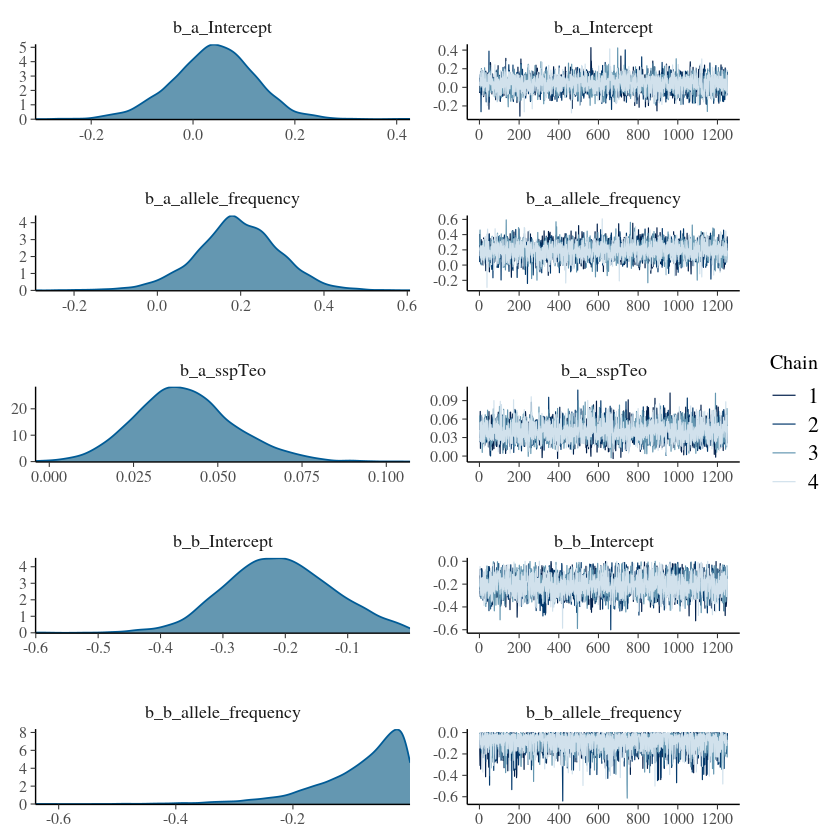

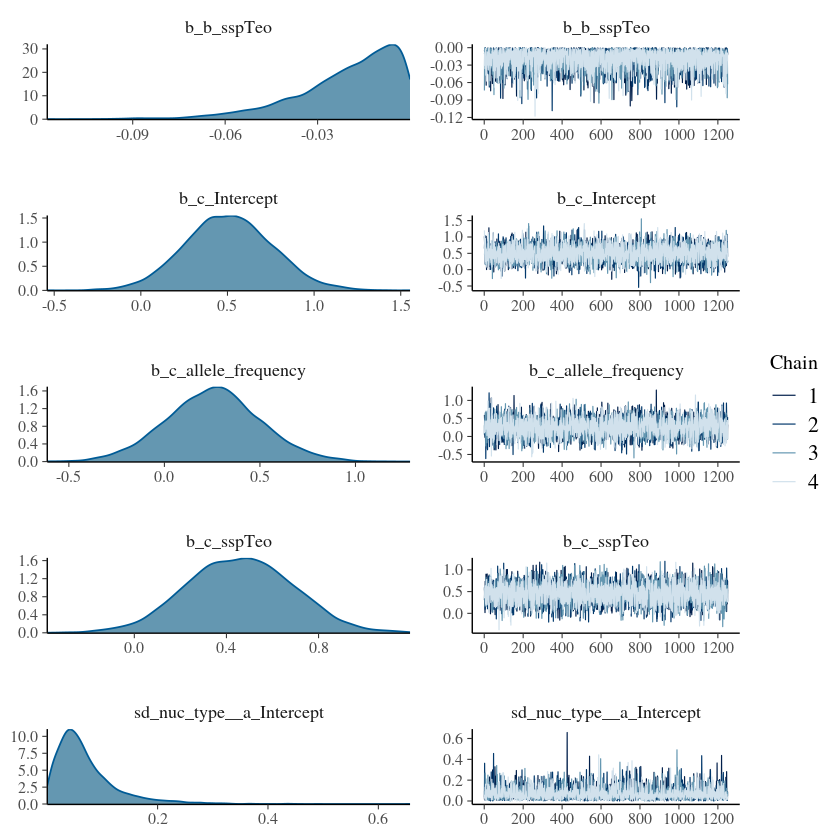

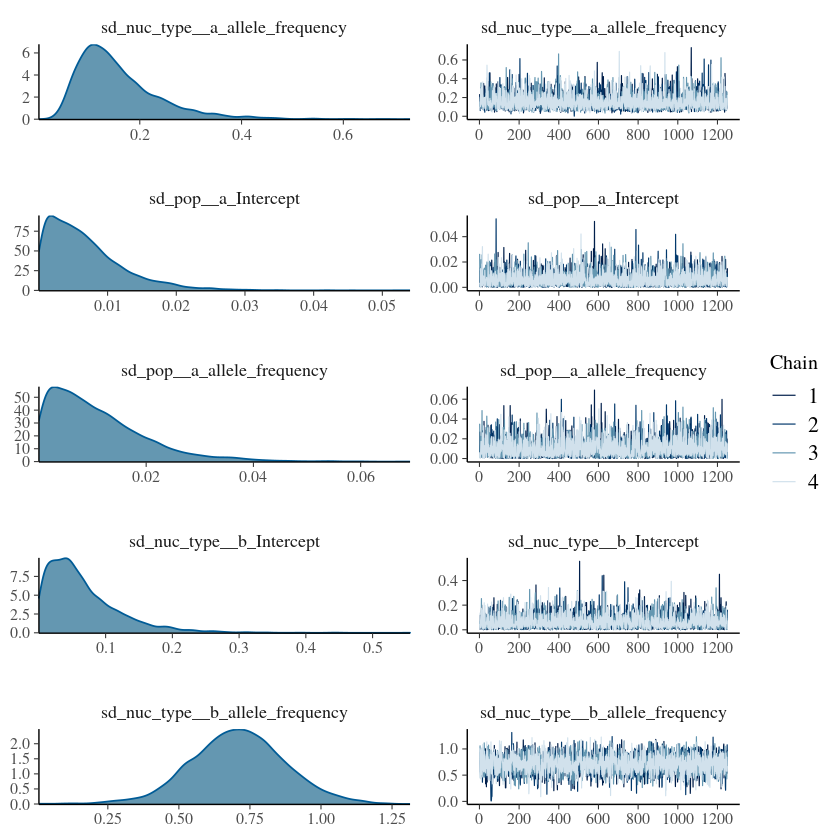

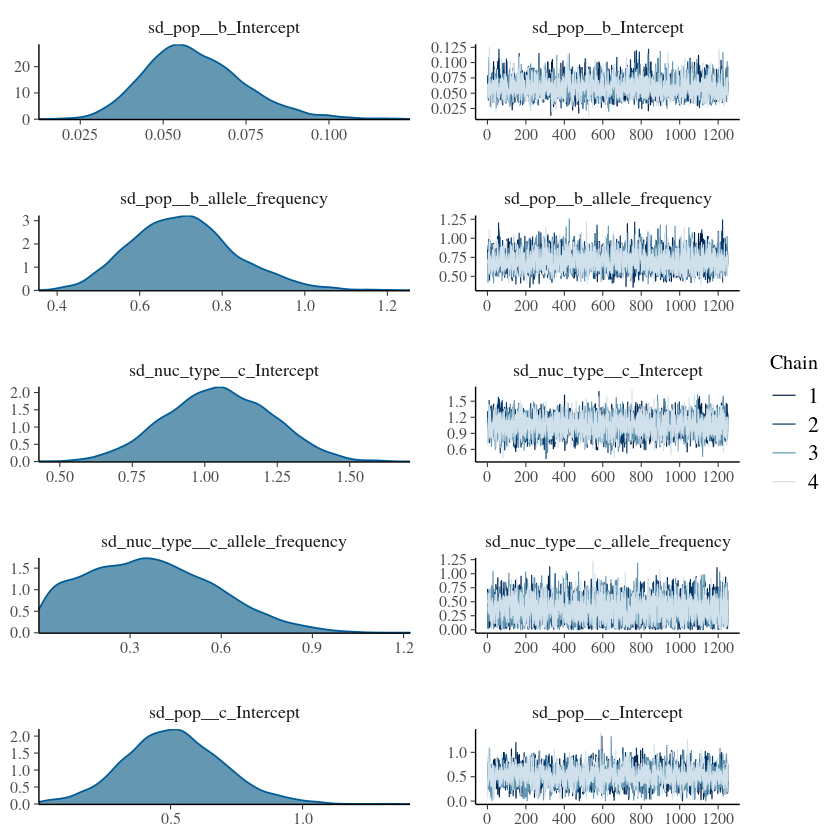

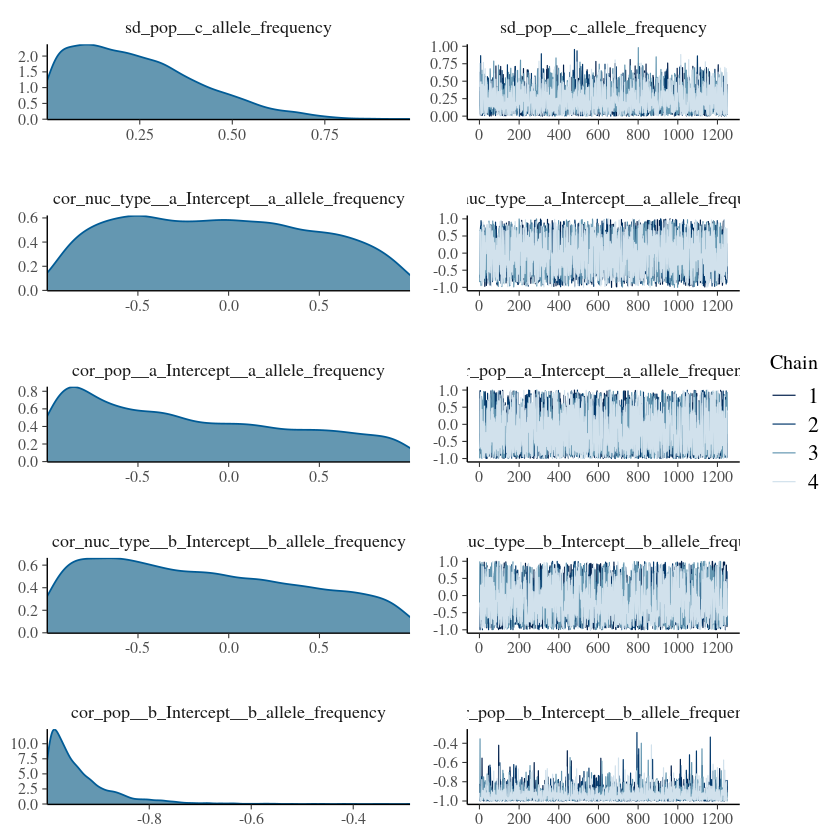

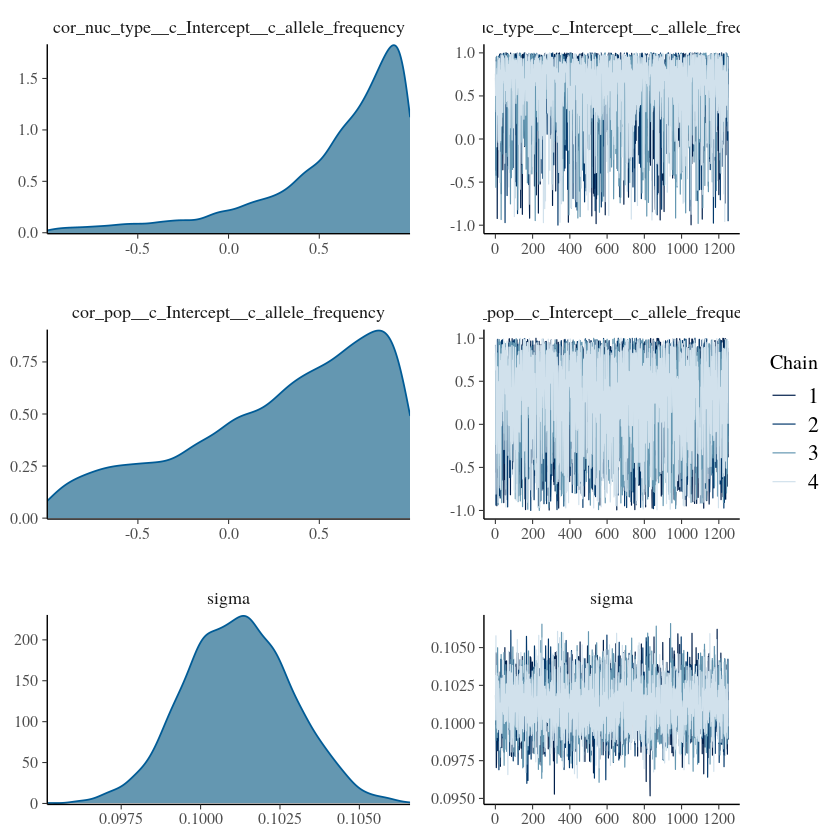

In [54]:
plot(mod_cor)

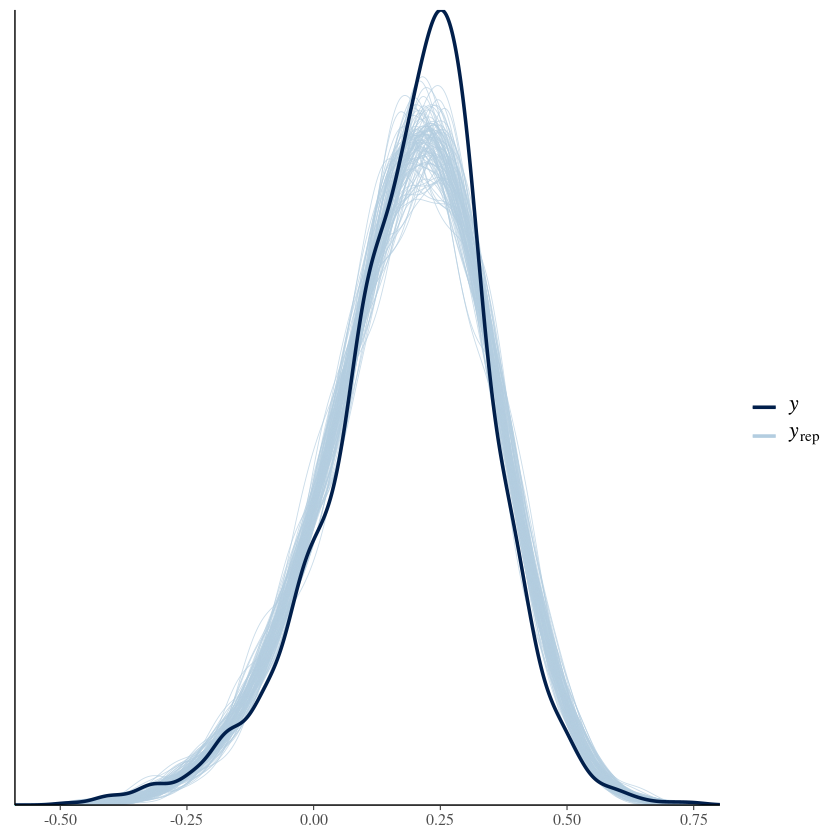

In [61]:
#posterior_predict(mod_ssp, nsamples = 10)
pp_check(mod_fixed, type = "dens_overlay", 100)

In [64]:
pred_df <- 
  sfs_df %>% 
  ungroup() %>% 
  select(ssp, nuc_type, pop) %>% 
  unique() %>% 
  mutate(allele_frequency = 1)

full_pred <- fitted(mod_cor, newdata = pred_df, scale = "response") %>% 
  data.frame() %>% 
  set_colnames(c("alpha", "error", "low", "high")) %>% 
  bind_cols(., pred_df)

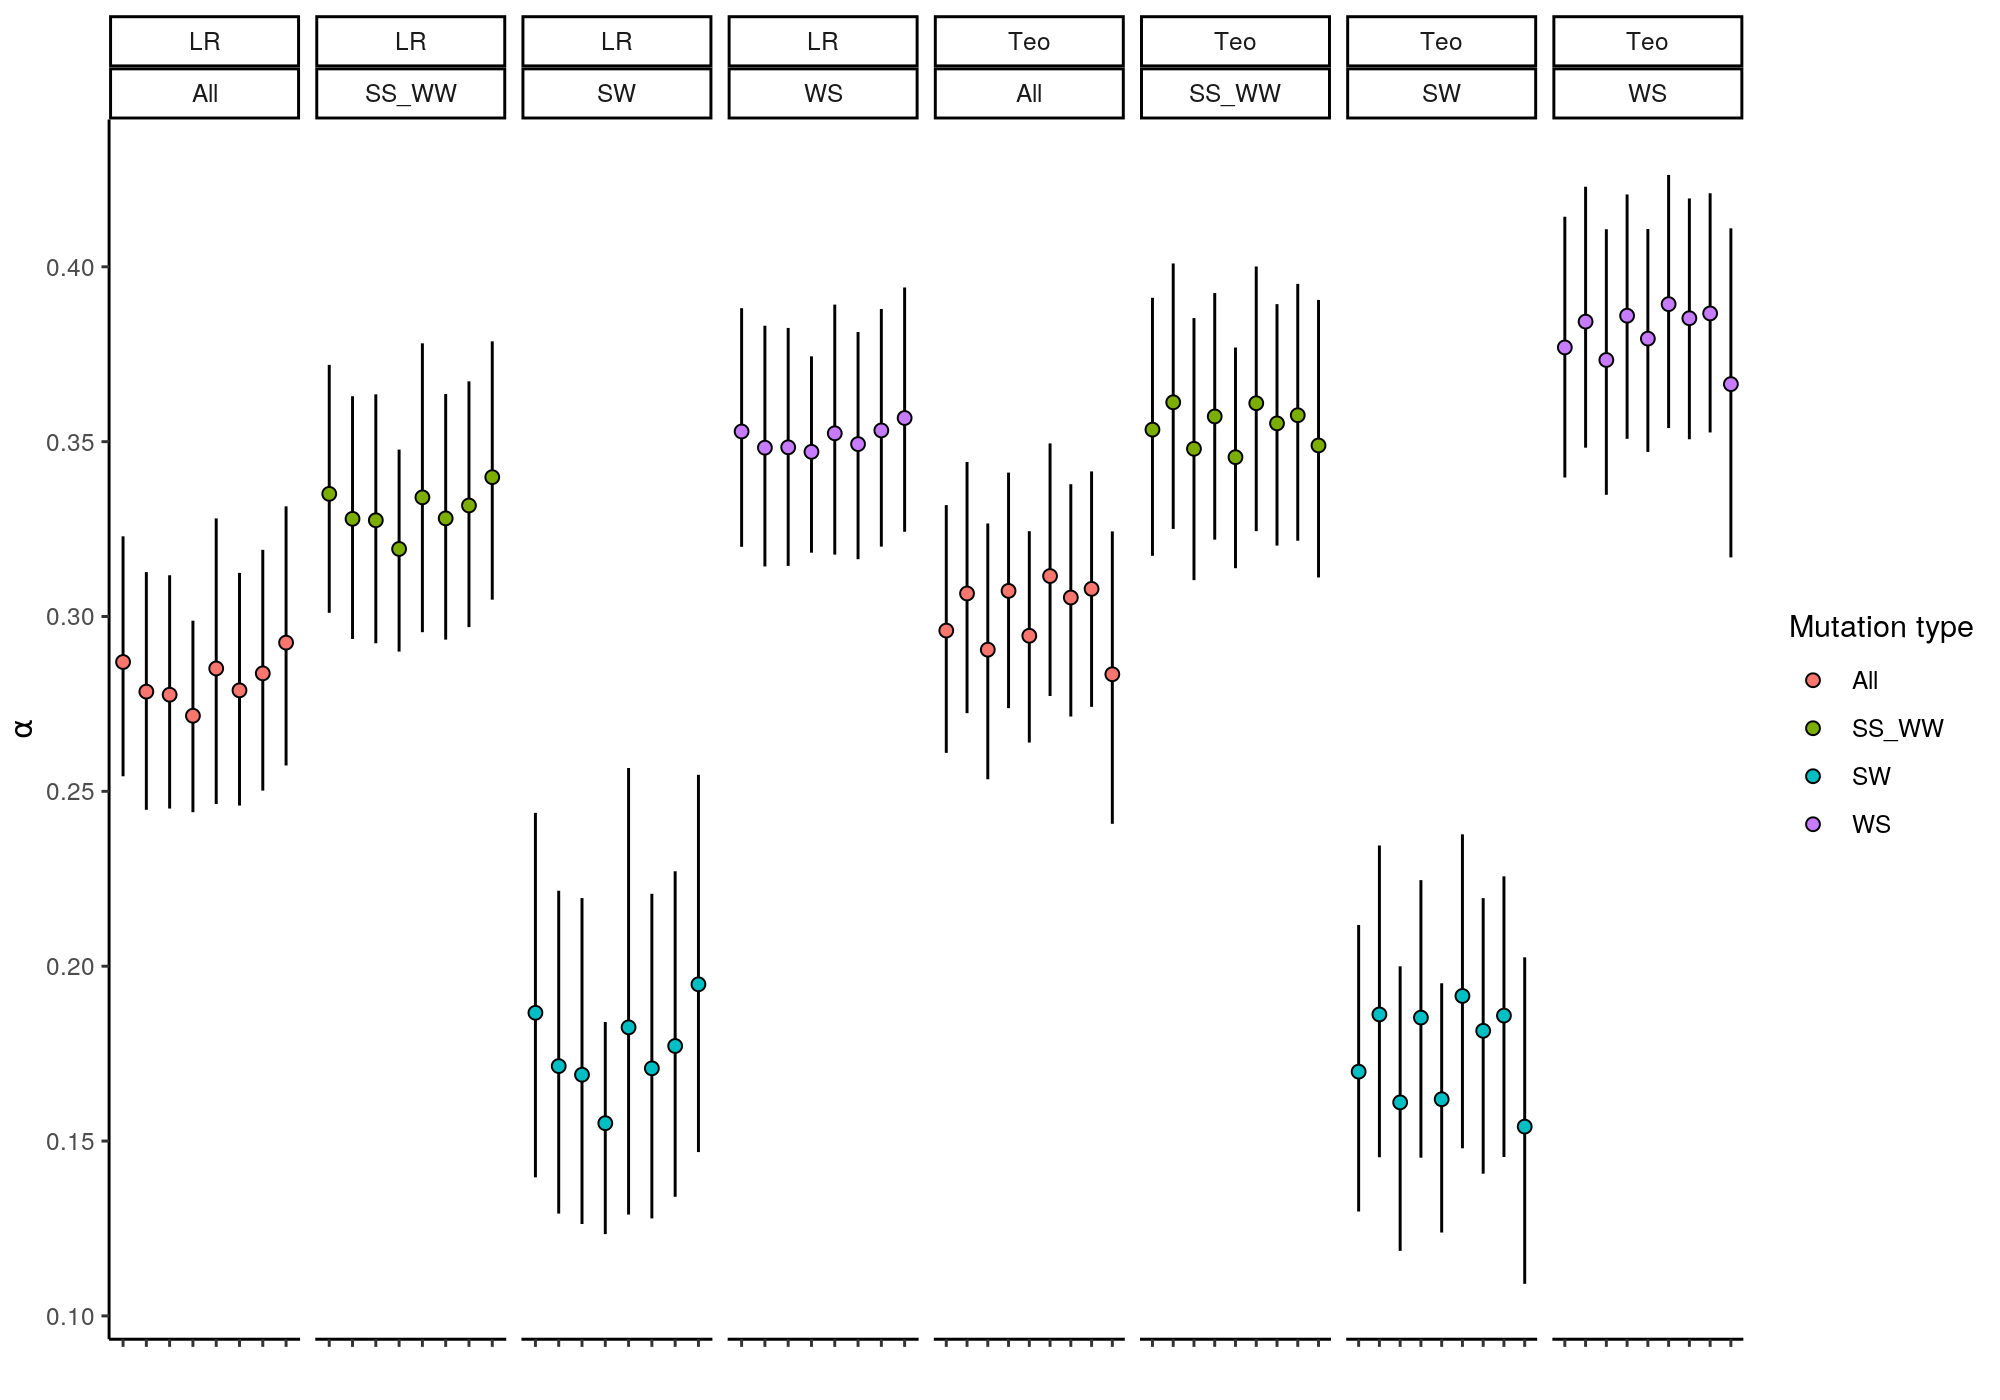

In [91]:
dodge <- position_dodge(width=0.2)  
full_pred %>% 
  ggplot(aes(pop, alpha, fill = nuc_type)) +
  geom_segment(aes(x = pop, y = low, xend = pop, yend = high), colour = "black") +
  geom_point(size = 2, pch = 21) +
  facet_wrap(~ssp + nuc_type, scales = "free_x", nrow = 1) +
  #geom_point(aes(pop, alpha_raw), shape = 2) +
  ylab(expression(alpha)) +
  xlab("") +
  #coord_flip()+
  #geom_hline(yintercept = 0, lty =2) +
  theme_classic() +
  scale_fill_discrete(name = "Mutation type") +
  theme(axis.text.x = element_blank()) +
  scale_y_continuous(breaks = scales::pretty_breaks(n = 10))

In [92]:
#LR > Teo?
sfs_df_filt <- filter(sfs_df, between(allele_frequency, 0.01, 0.99))
posts <- posterior_predict(mod_cor)
e_posts <- posterior_epred(mod_cor)
alpha_posts <- posterior_epred(mod_cor, newdata = pred_df,)

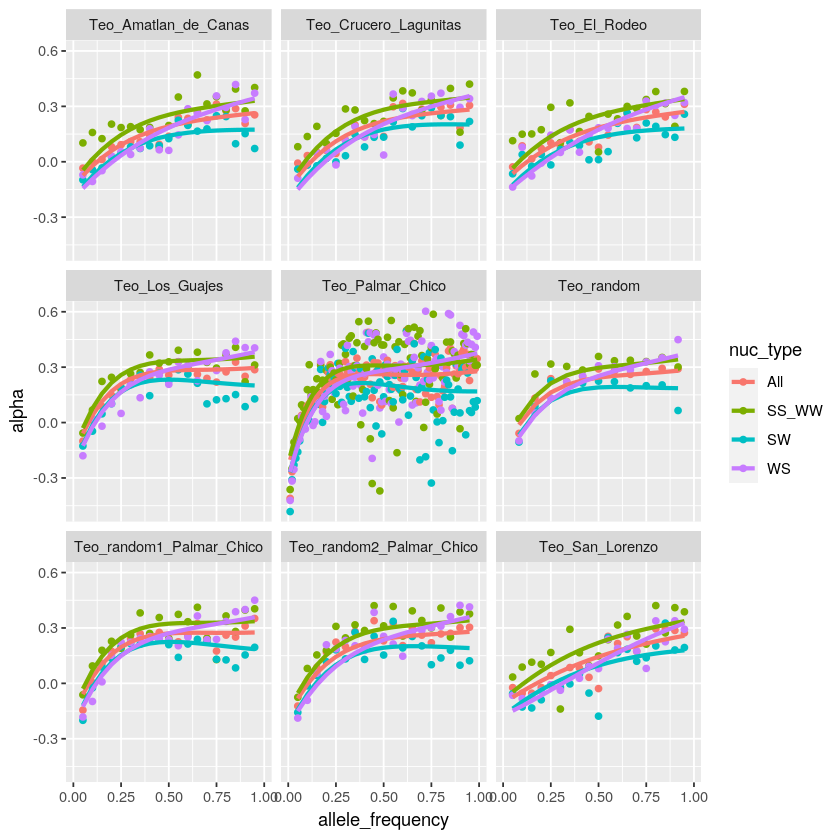

In [18]:
sfs_df_filt %>% 
    mutate(draw = e_posts[sample(1:5000, 1),]) %>% 
    filter(ssp == "Teo") %>% 
    group_by(pop) %>% 
    arrange(allele_frequency) %>% 
    ggplot() +
    geom_point(aes(allele_frequency, alpha, colour = nuc_type)) +
    geom_line(aes(allele_frequency, draw, colour = nuc_type), lwd = 1.2) +
    facet_wrap(~pop)

#plot(sfs_df_filt$allele_frequency, e_posts[sample(1:5000, 1),], col = factor(sfs_df_filt$pop), type = "p")

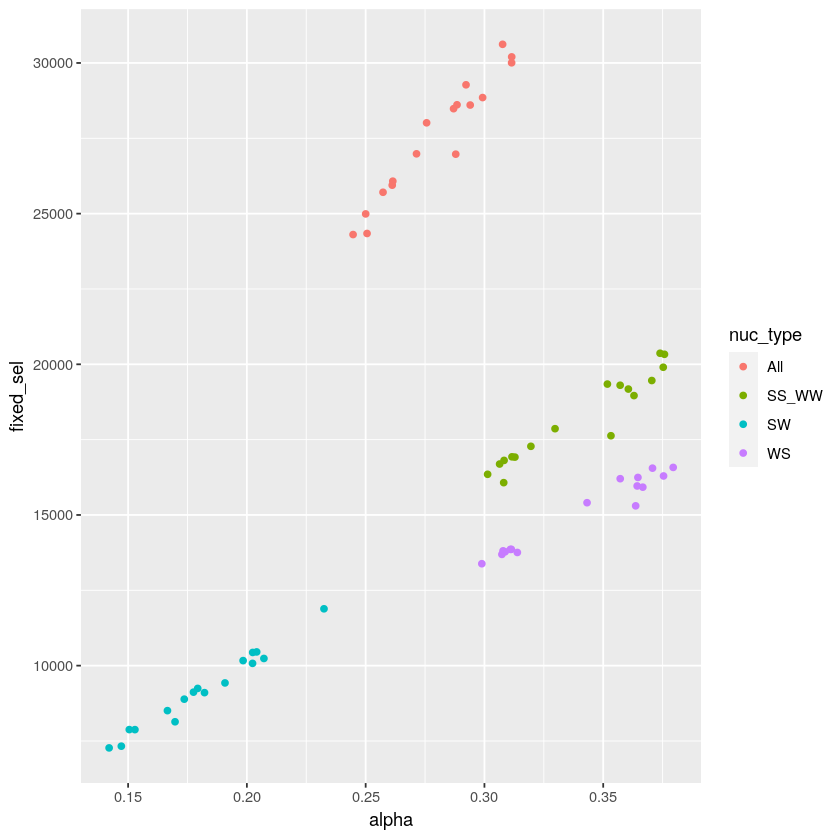

In [19]:
#get to post-checks to quantify probability of difference b/w groups and types, 
 #using the first two lines of this little tidbit is key

filter(sfs_df, allele_frequency == 1) %>% 
    mutate(alpha = alpha_posts[sample(1:5000, 1),],
           fixed_sel = alpha * fixed_0) %>% 
    ggplot(aes(alpha, fixed_sel, colour = nuc_type)) + 
    geom_point()
